### LSTM Practice Task

##### Data Preparation

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [3]:
# Reshape the images to match the input shape of the LSTM model
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)


In [4]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

##### Model Defination

In [5]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(28, 28)))
model.add(Dense(units=10, activation='softmax'))

##### Model Compilation

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### Model Training

In [8]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 40s 86ms/step - loss: 0.5669 - accuracy: 0.8176 - val_loss: 0.1692 - val_accuracy: 0.9513
Epoch 2/10
422/422 [==============================] - 44s 104ms/step - loss: 0.1647 - accuracy: 0.9504 - val_loss: 0.1057 - val_accuracy: 0.9703
Epoch 3/10
422/422 [==============================] - 32s 76ms/step - loss: 0.1140 - accuracy: 0.9657 - val_loss: 0.0897 - val_accuracy: 0.9720
Epoch 4/10
422/422 [==============================] - 37s 88ms/step - loss: 0.0862 - accuracy: 0.9728 - val_loss: 0.0716 - val_accuracy: 0.9795
Epoch 5/10
422/422 [==============================] - 34s 80ms/step - loss: 0.0684 - accuracy: 0.9792 - val_loss: 0.0641 - val_accuracy: 0.9815
Epoch 6/10
422/422 [==============================] - 34s 81ms/step - loss: 0.0586 - accuracy: 0.9818 - val_loss: 0.0616 - val_accuracy: 0.9838
Epoch 7/10
422/422 [==============================] - 32s 77ms/step - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.0574 - val_accuracy

##### Model Evaluation

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 0.0553 - accuracy: 0.9838
Test Loss:  0.05531063303351402
Test Accuracy:  0.9837999939918518


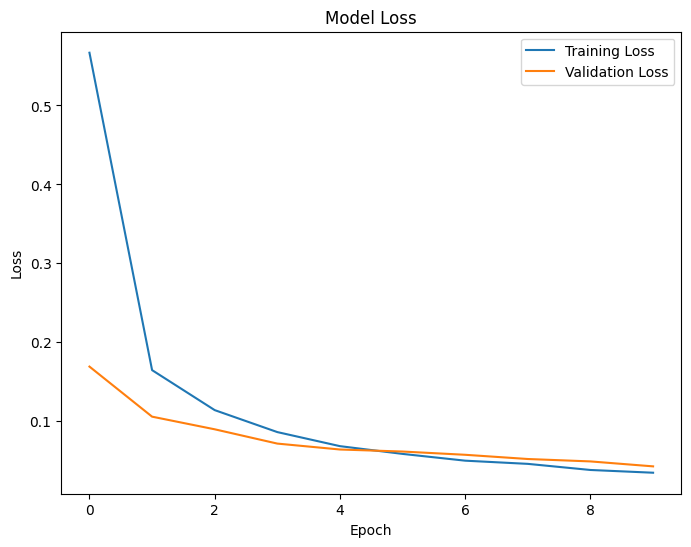

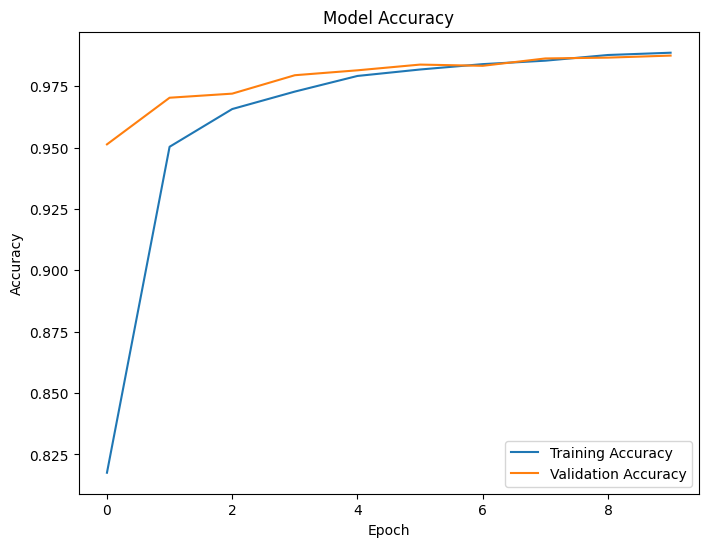

In [10]:
# Plot the training loss and accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Make Predictions

In [11]:
X_pred = X_test[:5]  # First 5 samples from the testing data
y_pred = model.predict(X_pred)
predicted_labels = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 455ms/step


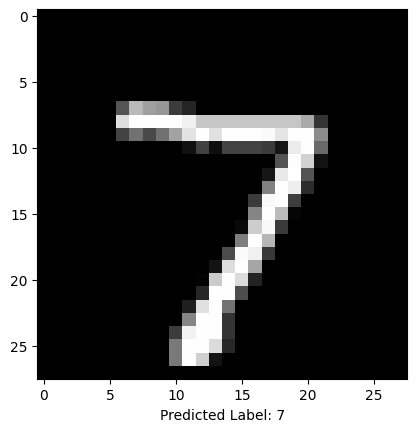

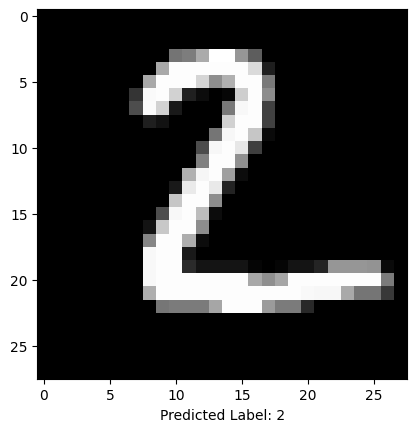

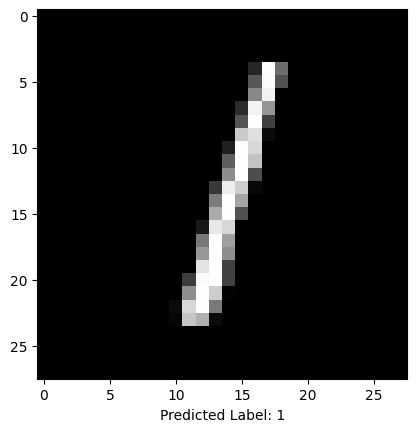

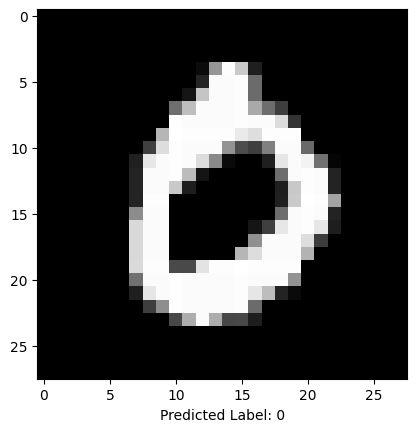

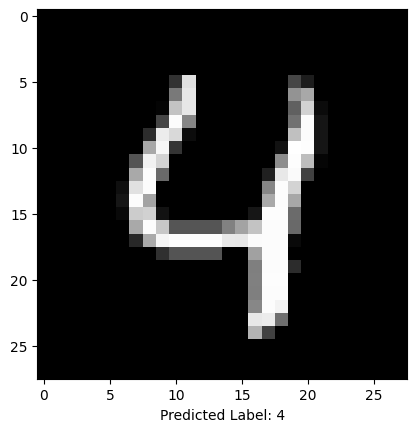

In [12]:
# Visualize the predictions
for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.xlabel("Predicted Label: " + str(predicted_labels[i]))
    plt.show()